In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1    165
0    138
Name: target, dtype: int64

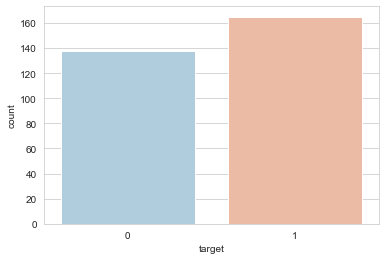

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')
df["target"].value_counts()

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


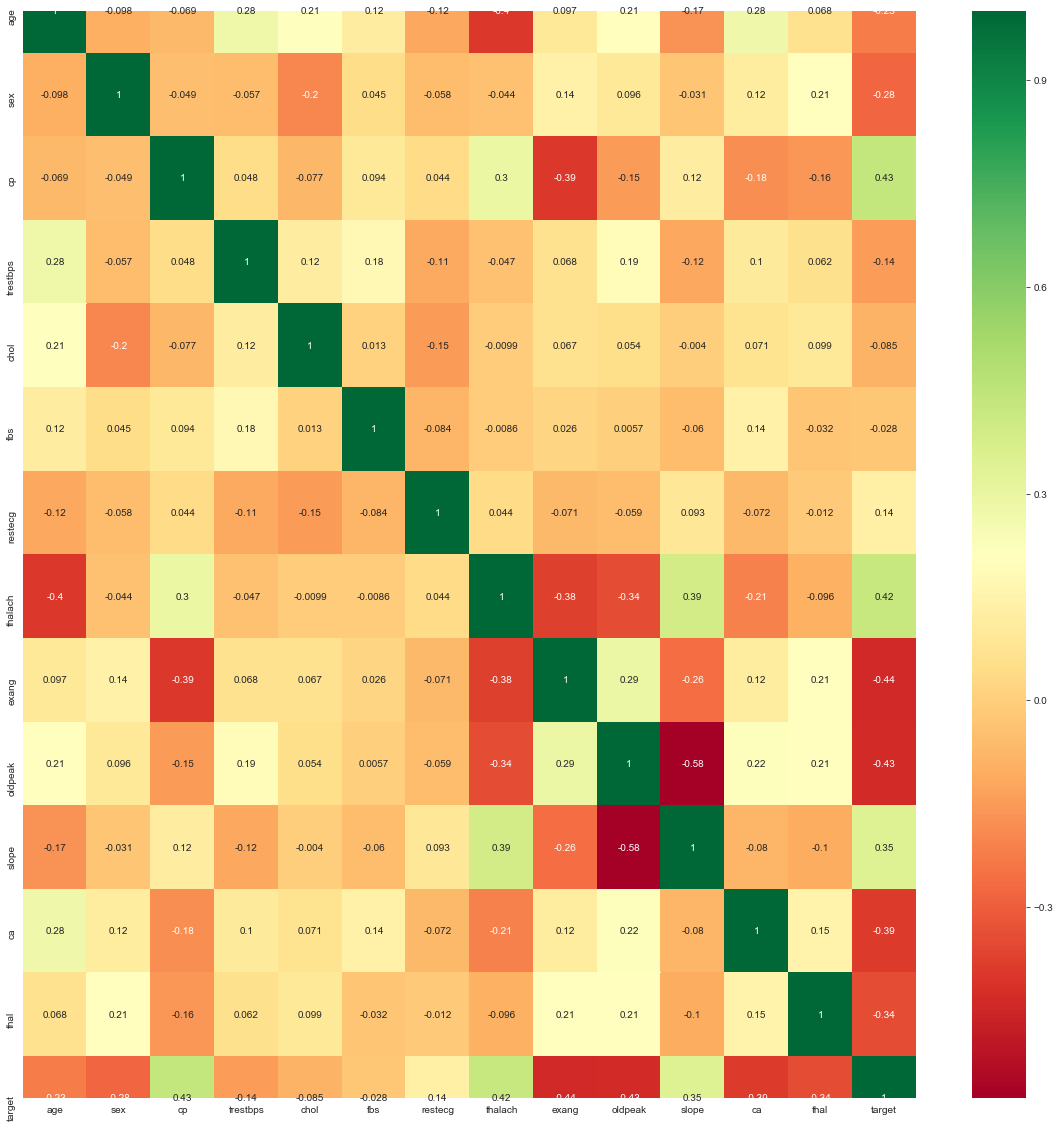

In [7]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228B3819548>,
      dtype=object)

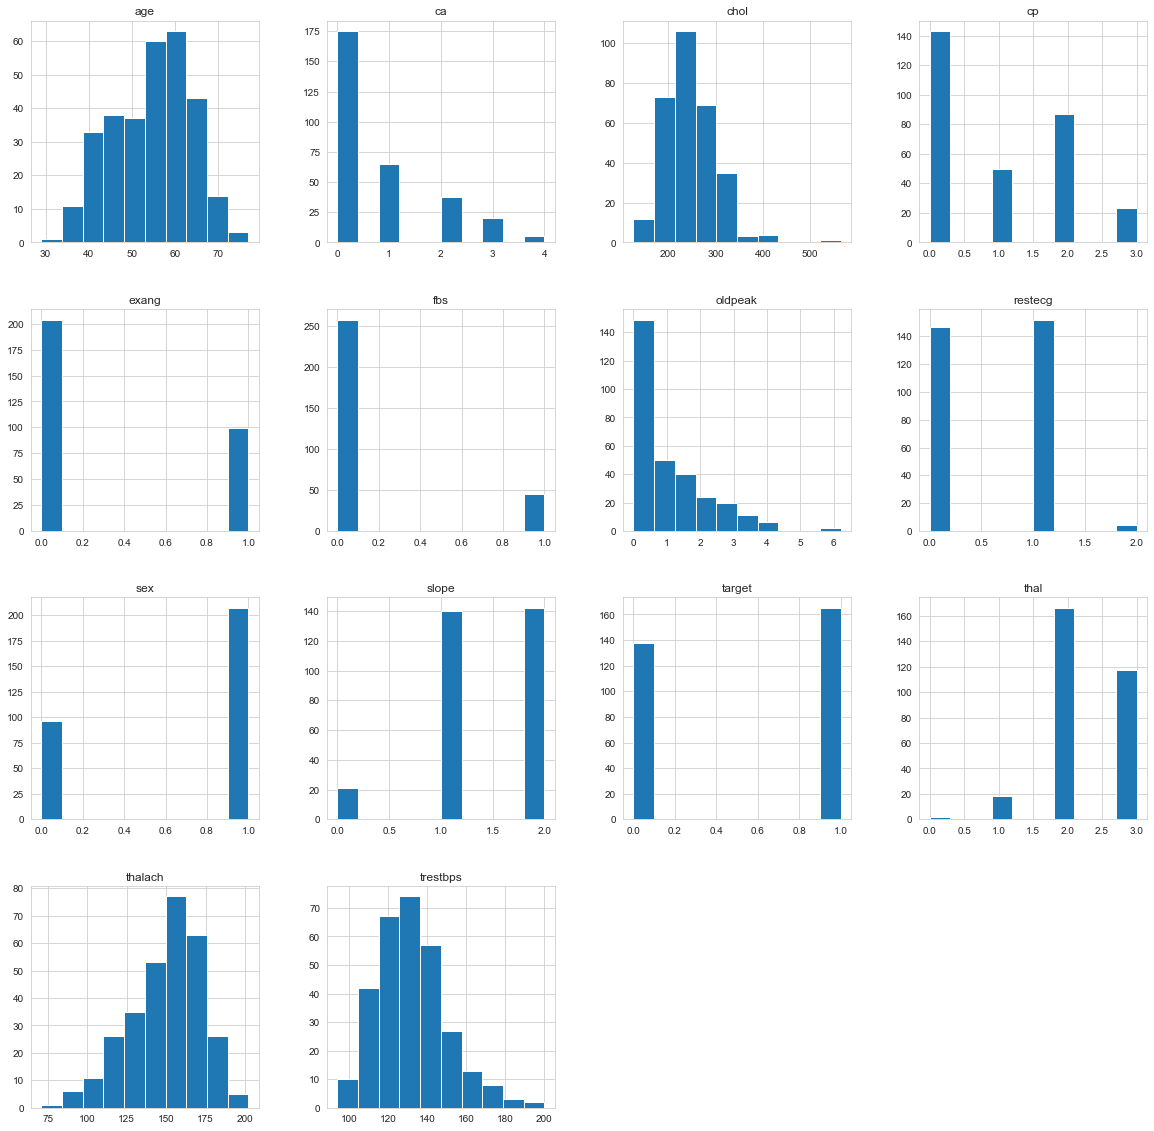

In [8]:

df.hist(figsize=(20,20))

C:\Users\aksha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aksha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


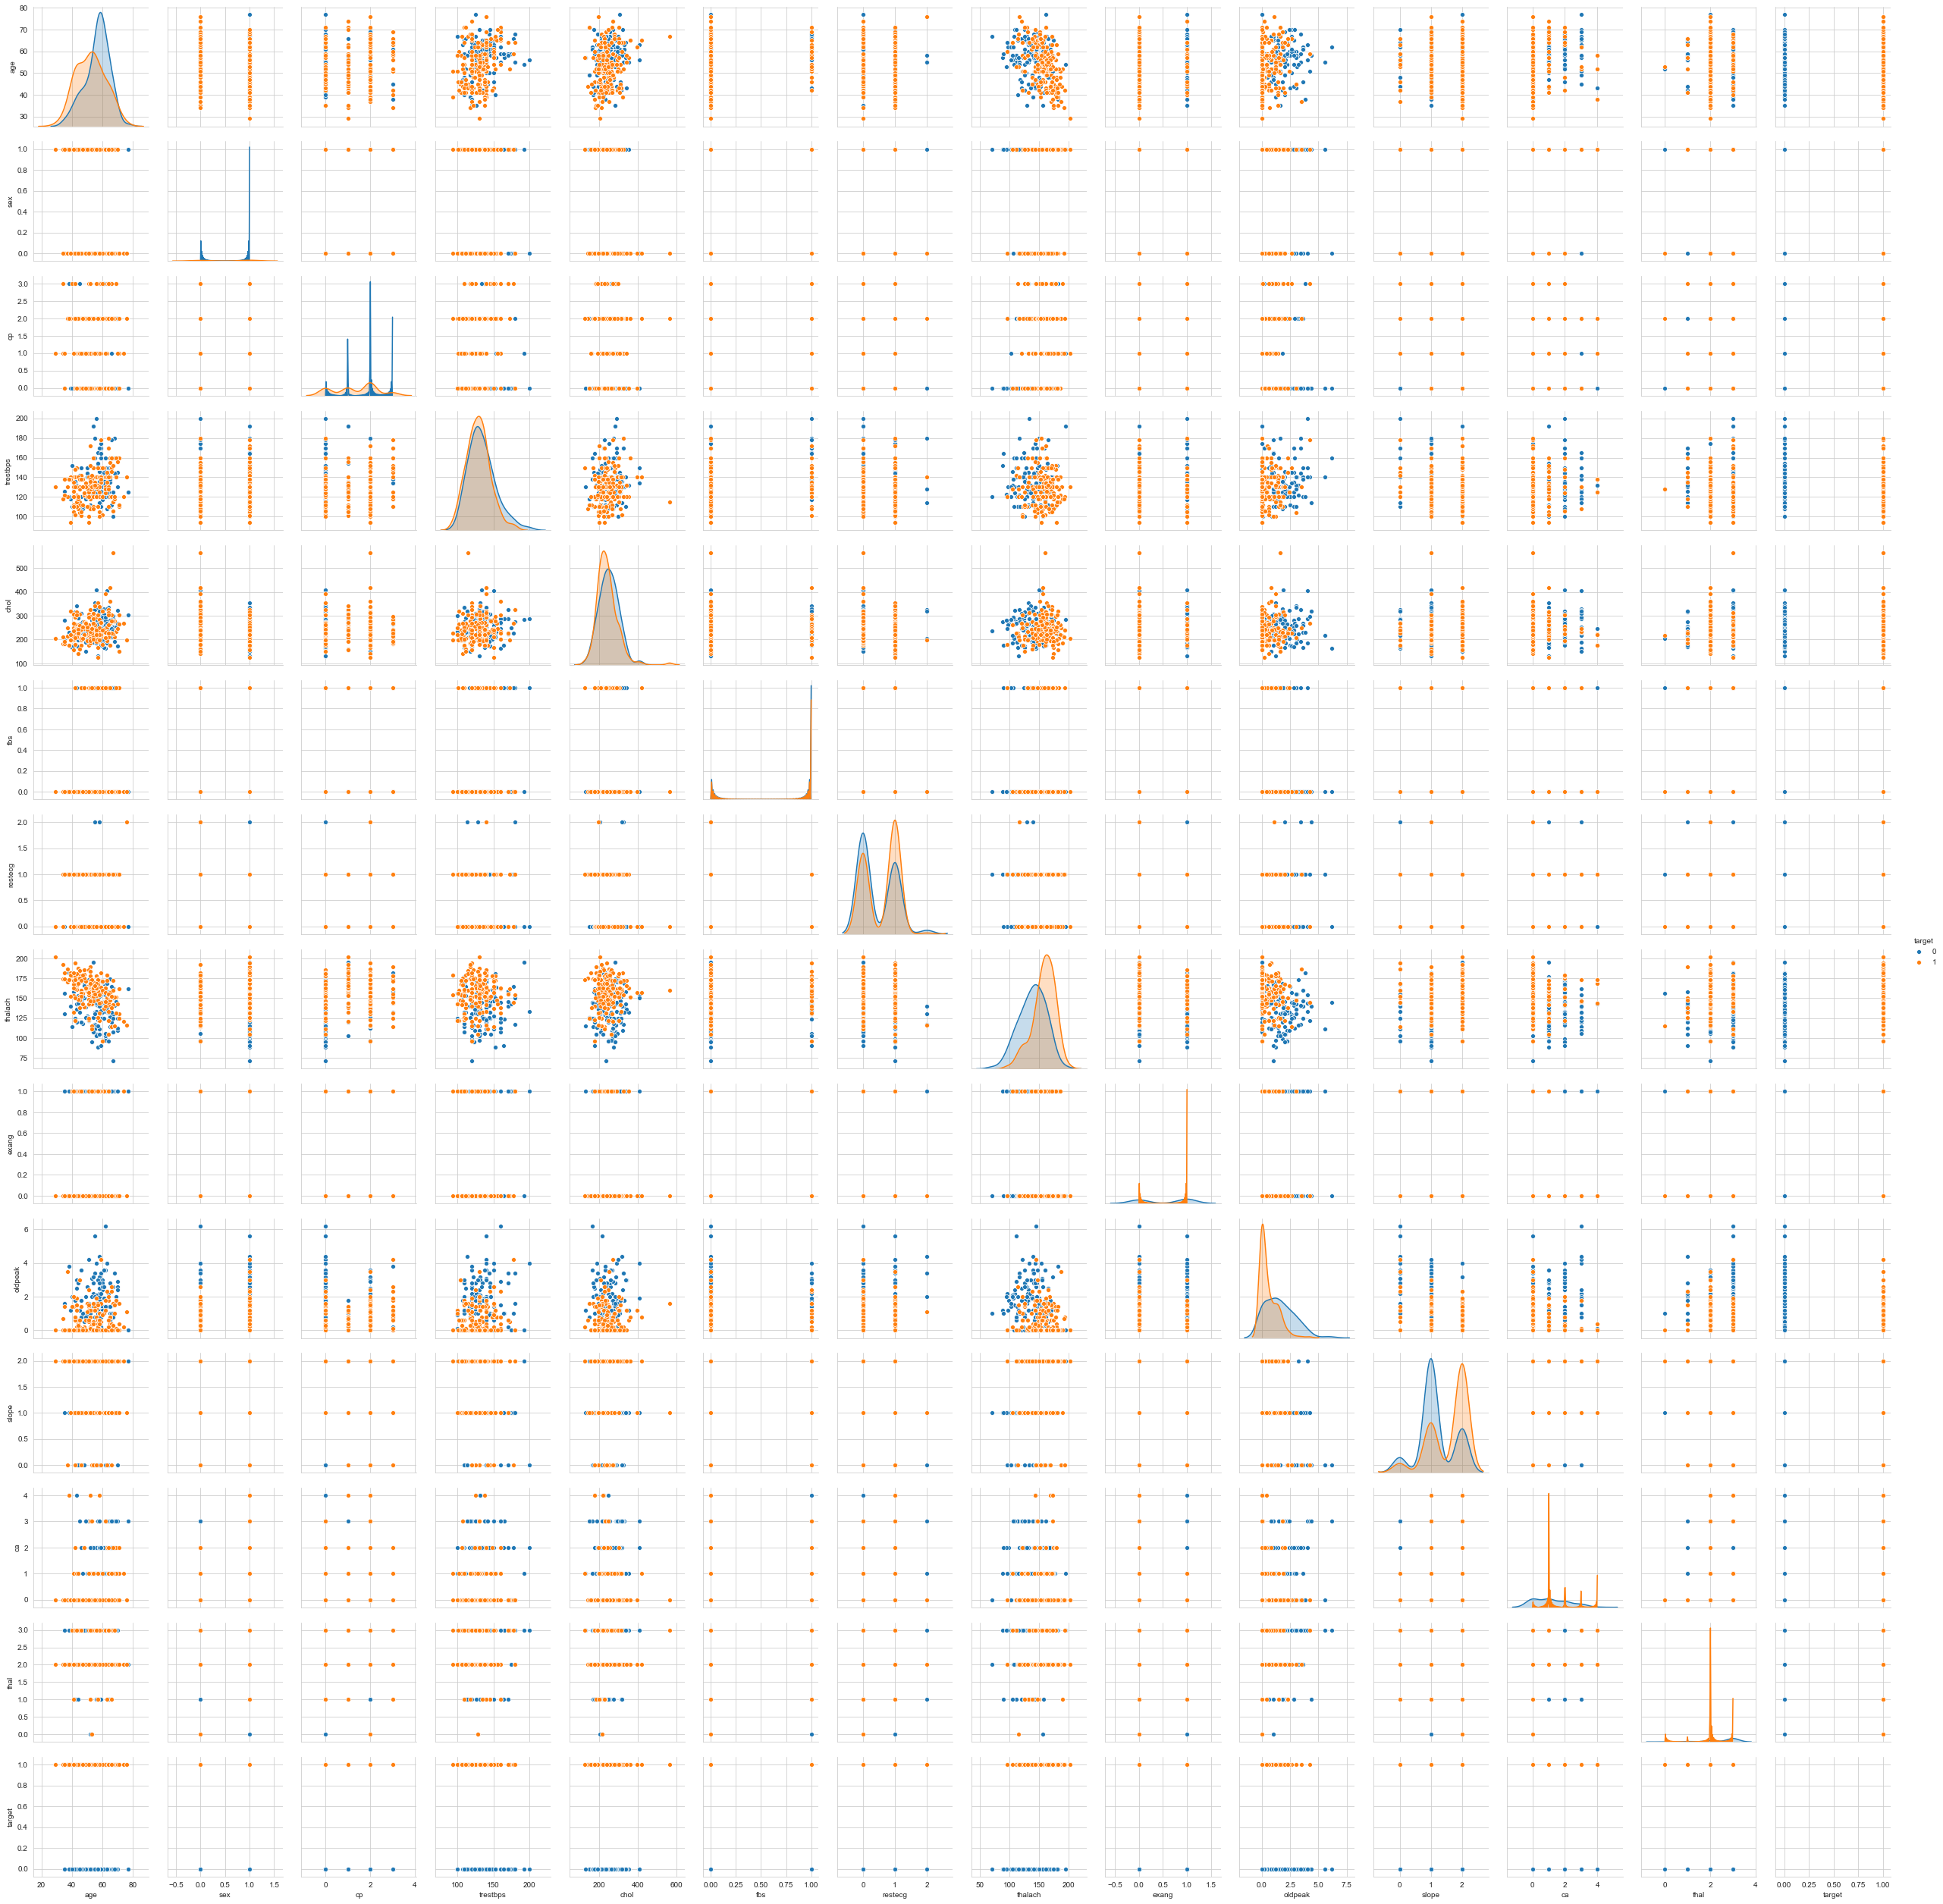

In [9]:
sns.pairplot(df,hue="target")

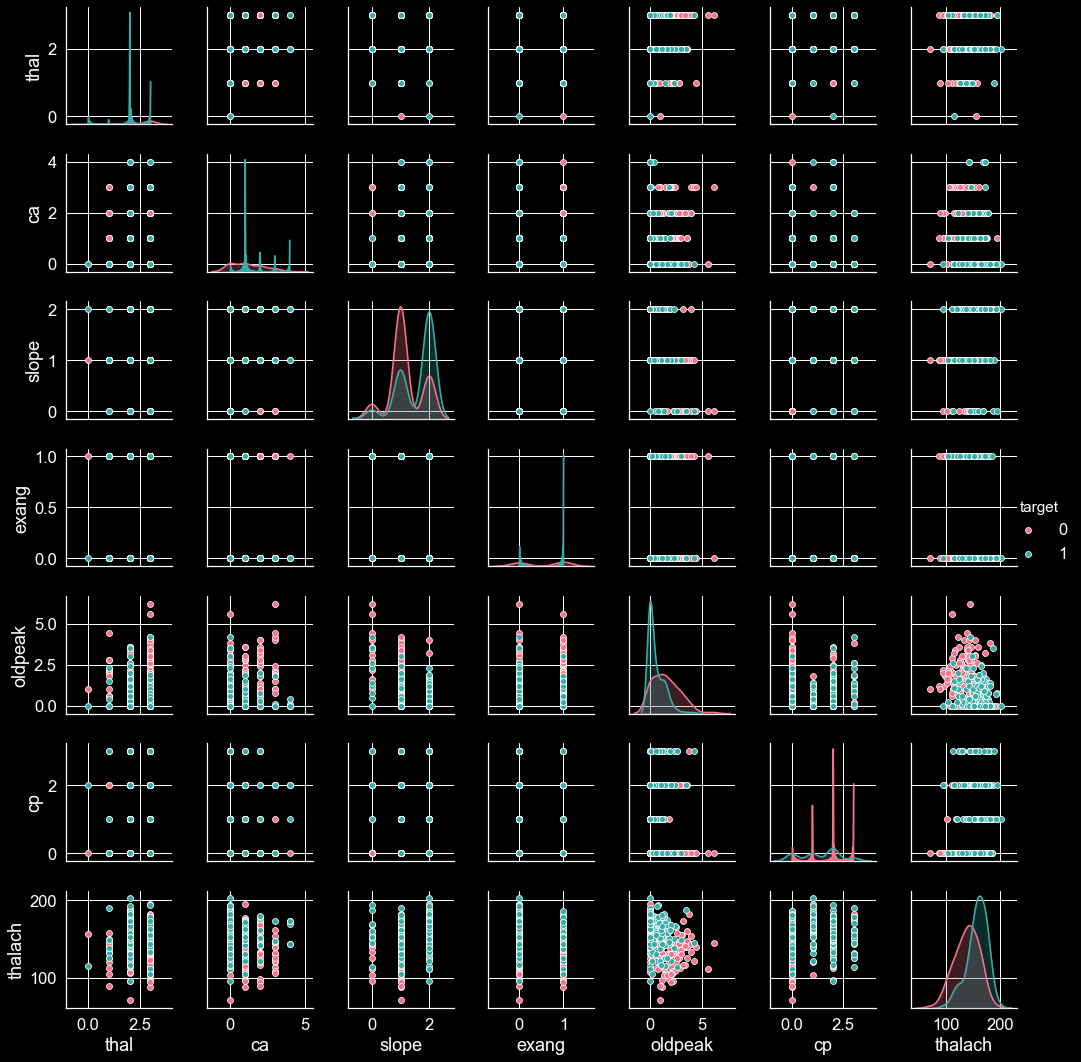

In [10]:
columns=["thal","ca","slope","exang","oldpeak","cp","thalach"]
sns.set(font_scale=1.5)
with plt.style.context("dark_background"):
    axes=sns.pairplot(df,vars=columns,hue="target",palette="husl")
    axes.fig.set_size_inches(15,15)
    

In [11]:
y = df['target']
X = df.drop(['target'], axis = 1)
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [12]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit(X)
x_pca=pca.transform(X)

In [13]:
x_pca.shape

(303, 2)

In [14]:
X.shape

(303, 13)

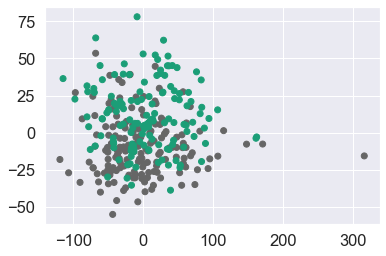

In [15]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap="Dark2")

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
print(np.size(X.columns))
columns=X.columns
columns

13


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

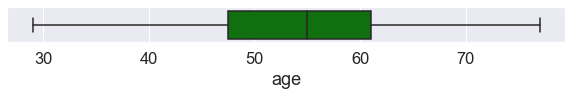

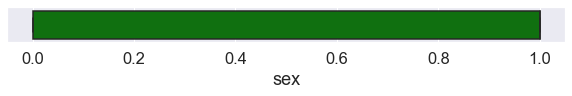

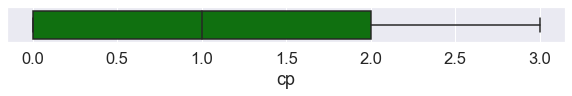

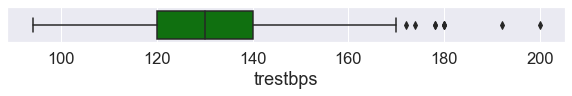

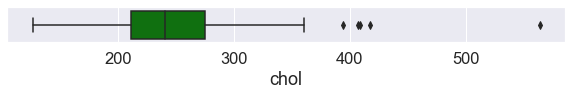

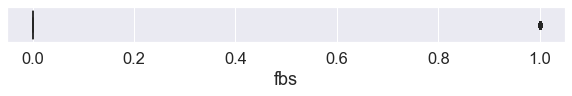

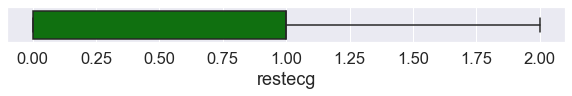

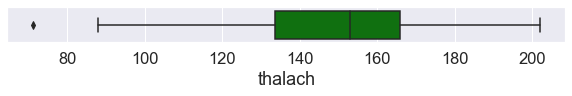

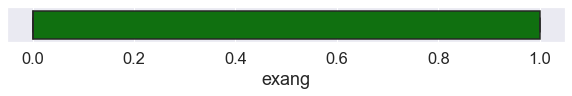

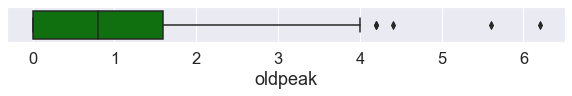

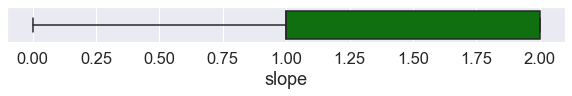

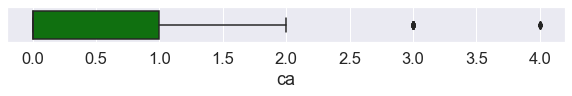

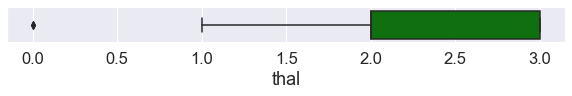

In [18]:

plt.figure(figsize=(10,10))
for i in range(13):
    plt.figure(figsize=(10,10))
    plt.subplot2grid((13,1),(i,0))
    sns.boxplot(df[columns[i]],color="green")

In [19]:
defect_columns=["thal","ca","thalach","chol","trestbps","oldpeak"]

In [20]:
len=np.size(defect_columns)
for i in range(len):
    quantile1,quantile3=np.percentile(df[defect_columns[i]].values,[25,75])
    iqr_value=quantile3-quantile1
    lower_bound_val=quantile1-(1.5*iqr_value)
    upper_bound_val=quantile3+(1.5*iqr_value)
    df.drop(df[df[defect_columns[i]]>upper_bound_val].index,inplace=True)
    df.drop(df[df[defect_columns[i]] <lower_bound_val].index,inplace=True)
    
    
    

In [21]:
y = df['target']
X = df.drop(['target'], axis = 1)
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 302
Data columns (total 13 columns):
age         259 non-null int64
sex         259 non-null int64
cp          259 non-null int64
trestbps    259 non-null int64
chol        259 non-null int64
fbs         259 non-null int64
restecg     259 non-null int64
thalach     259 non-null int64
exang       259 non-null int64
oldpeak     259 non-null float64
slope       259 non-null int64
ca          259 non-null int64
thal        259 non-null int64
dtypes: float64(1), int64(12)
memory usage: 28.3 KB


In [23]:
from sklearn.manifold import TSNE
tsne=TSNE().fit_transform(X)
tsne.shape


(259, 2)

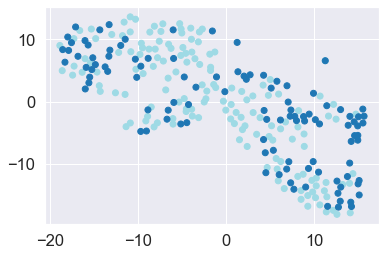

In [24]:
plt.scatter(tsne[:,0],tsne[:,1],c=y,cmap="tab20")

In [25]:
pca=PCA(n_components=2)
x_pca=pca.fit(X)
x_pca=pca.transform(X)

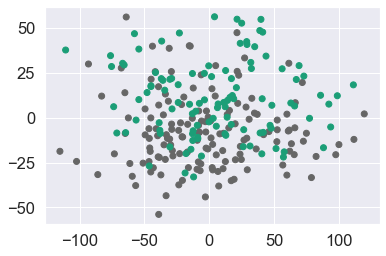

In [26]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap="Dark2")

In [27]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
columns_to_be_scaled=["age","trestbps","chol","thalach"]

In [30]:
from scipy.stats import norm 

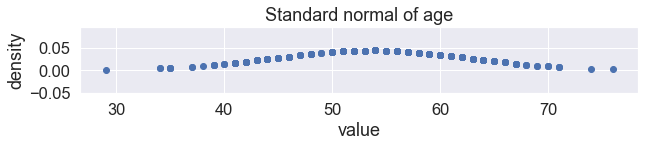

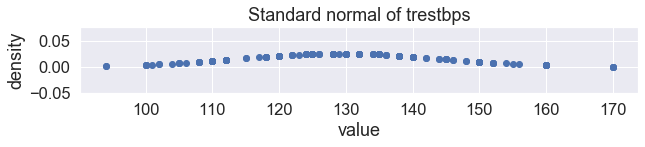

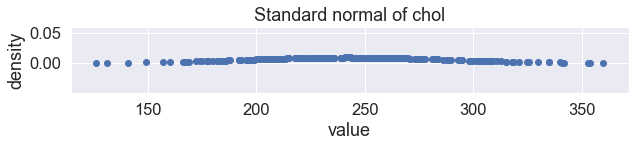

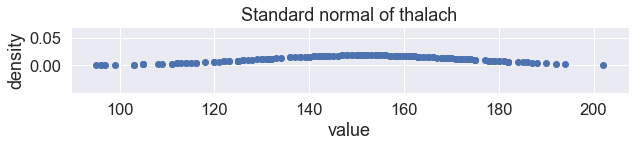

In [31]:
for i in range(np.size(columns_to_be_scaled)):
    
    mean=np.mean(X[columns_to_be_scaled[i]])
    std=np.std(X[columns_to_be_scaled[i]])
    plt.figure(figsize=(10,10))
    plt.subplot2grid((7,1),(i,0))
    plt.scatter(X[columns_to_be_scaled[i]],norm.pdf(X[columns_to_be_scaled[i]],mean,std))
    plt.title(f'Standard normal of {columns_to_be_scaled[i]}')
    plt.xlabel("value")
    plt.ylabel("density")
    plt.show()

so from above we can see that they all follow gussian distribution so we do std scaling 

In [32]:
standardScaler = StandardScaler()
X[columns_to_be_scaled] = standardScaler.fit_transform(X[columns_to_be_scaled])

In [33]:
X.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.022189,1,3,1.031310,-0.206860,1,0,-0.067066,0,2.3,0,0,1
1,-1.849492,1,2,0.048568,0.177284,0,1,1.619802,0,3.5,0,0,2
2,-1.407695,0,1,0.048568,-0.862164,0,0,0.935936,0,1.4,2,0,2
3,0.249044,1,1,-0.606594,-0.139070,0,1,1.209483,0,0.8,2,0,2
4,0.359493,0,0,-0.606594,2.527340,0,1,0.525617,1,0.6,2,0,2


In [34]:
#np.size(df["oldpeak"])

In [35]:
'''#for i,x in enumerate(df["oldpeak"]):
    
    if x!=0 :
        #print(i)
        
        df["oldpeak"][i]=np.log(x)
    else:
        #print(i)
        
        df["oldpeak"][i]=x'''

        
        


'#for i,x in enumerate(df["oldpeak"]):\n    \n    if x!=0 :\n        #print(i)\n        \n        df["oldpeak"][i]=np.log(x)\n    else:\n        #print(i)\n        \n        df["oldpeak"][i]=x'

In [36]:
#np.size(df["oldpeak"])


In [37]:
#X.info()

In [38]:
#df["oldpeak"]=standardScaler.fit_transform([df["oldpeak"]])

In [39]:
#df.fillna(0)

In [40]:
#type(X["oldpeak"])

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y)

In [42]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

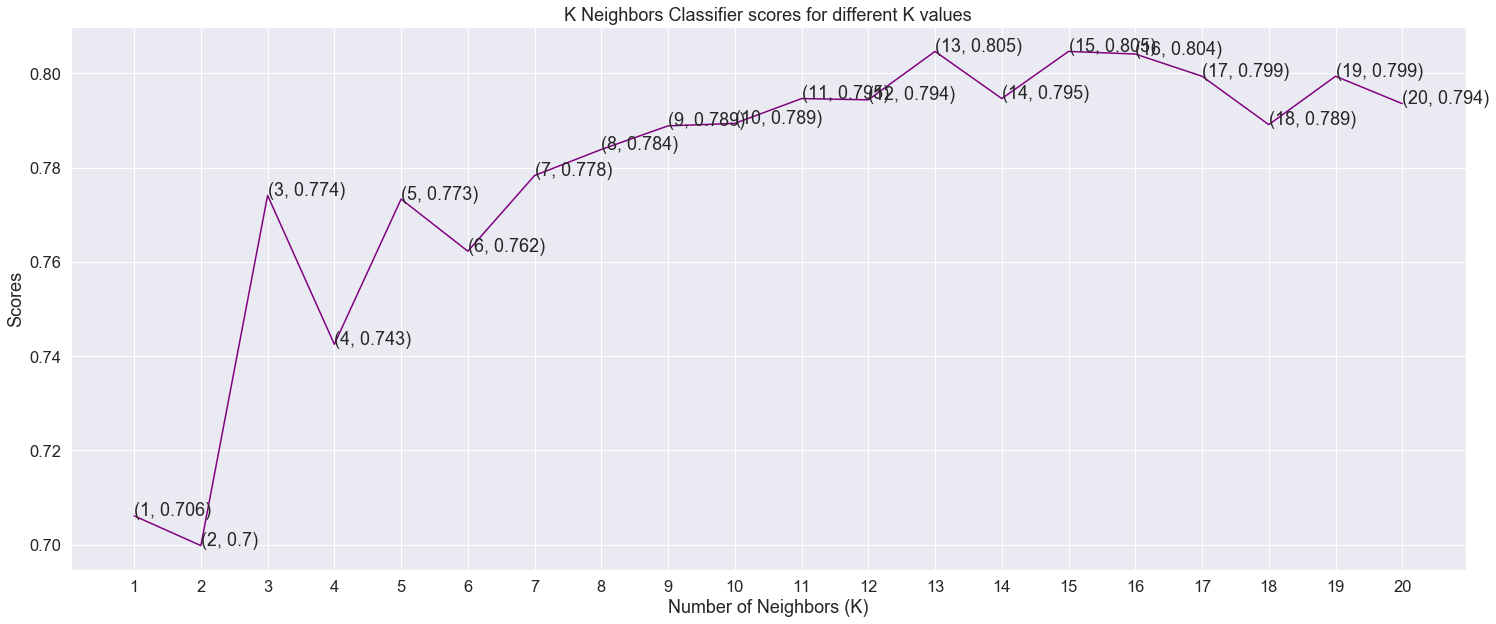

In [43]:
plt.figure(figsize=(25,10))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'purple')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, round((knn_scores[i-1]),3)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

So we train it with 4 as k , and lets see the test score 

In [44]:
knn_classifier = KNeighborsClassifier(n_neighbors = 13)
model=knn_classifier.fit(x_train,y_train)

In [45]:
model.score(x_train,y_train)

0.8247422680412371

In [46]:
model.score(x_test,y_test)

0.8307692307692308

In [47]:
score=cross_val_score(model,x_test,y_test,cv=10)

In [48]:
score.mean()

0.8357142857142857

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:

randomforest_classifier= RandomForestClassifier(n_estimators=200)

score=cross_val_score(randomforest_classifier,x_train,y_train,cv=10)

In [51]:
score.mean()

0.804093567251462

In [52]:
model2=randomforest_classifier.fit(x_train,y_train)

In [53]:
model2.score(x_train,y_train)

1.0

In [54]:
model2.score(x_test,y_test)

0.7692307692307693

In [55]:
#test score

In [56]:
score=cross_val_score(model2,x_test,y_test,cv=10)

In [57]:
score.mean()

0.869047619047619

In [58]:
pred=model2.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[17,  2],
       [13, 33]], dtype=int64)

Text(0.5, 1, 'confusion matrix')

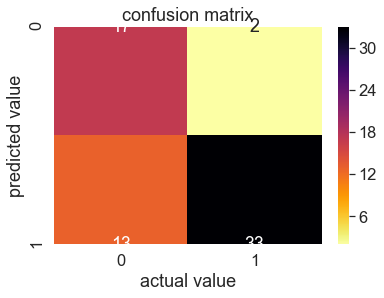

In [60]:
import seaborn as sn
sn.heatmap(cm,annot=True,cmap="inferno_r")
plt.ylabel("predicted value")
plt.xlabel("actual value")
plt.title("confusion matrix")

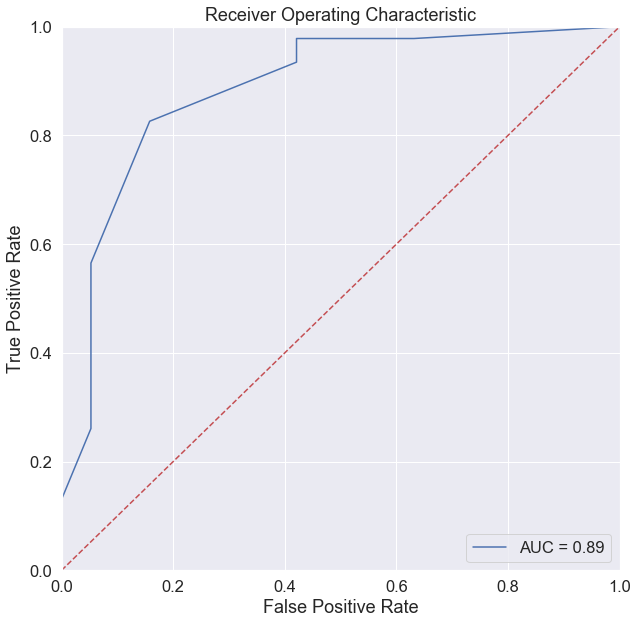

In [61]:
import sklearn.metrics as metrics
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10,10))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr,"b", label = "AUC = %0.2f" % roc_auc)
plt.legend(loc ="lower right")
plt.plot([0, 1], [0, 1],"r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [62]:
y_test=list(y_test)

In [63]:

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(np.size(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [64]:
pref_m=perf_measure(y_test,list(pred))

In [65]:
pref_m

(33, 2, 17, 13)

In [66]:
TP, FP, TN, FN=perf_measure(y_test,list(pred))

In [67]:
# Sensitivity or true positive rate
sensitivity = TP/(TP+FN)
# Specificity or true negative rate
specificity = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)

In [68]:
sensitivity

0.717391304347826

In [69]:
specificity

0.8947368421052632

In [70]:
PPV

0.9428571428571428

In [71]:
from xgboost import XGBClassifier

In [72]:
xg_model=XGBClassifier()

In [73]:
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
xg_model.score(x_train,y_train)

1.0

In [75]:
xg_model.score(x_test,y_test)

0.7538461538461538

In [76]:
xg_score=cross_val_score(xg_model,x_test,y_test,cv=10)

In [77]:
xg_score.mean()

0.880952380952381

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier()
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [79]:
gb_model.score(x_train,y_train)

1.0

In [80]:
gb_model.score(x_test,y_test)

0.7692307692307693

In [81]:
gb_score=cross_val_score(gb_model,x_test,y_test,cv=10)

In [82]:
gb_score

array([0.85714286, 1.        , 1.        , 0.57142857, 0.71428571,
       0.28571429, 0.83333333, 0.83333333, 0.83333333, 1.        ])

In [83]:
gb_score.mean()

0.7928571428571429

In [84]:
xg_model_pred=xg_model.predict(x_test)

In [85]:
xg_model_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [86]:
y_test=list(y_test)

XGBOOST

In [87]:
x_TP, x_FP, x_TN, x_FN=perf_measure(y_test,list(xg_model_pred))

In [88]:
a=perf_measure(y_test,list(xg_model_pred))

In [89]:
a

(32, 2, 17, 14)

In [90]:
# Sensitivity or true positive rate
x_sensitivity = x_TP/(x_TP+x_FN)
# Specificity or true negative rate
x_specificity = x_TN/(x_TN+x_FP) 
# Precision or positive predictive value
x_PPV = x_TP/(x_TP+x_FP)

In [91]:
x_sensitivity

0.6956521739130435

In [92]:
x_specificity

0.8947368421052632

In [93]:
x_PPV

0.9411764705882353

GRADIENT BOOSTING

In [94]:
gb_pred=gb_model.predict(x_test)

In [95]:
gb_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [96]:
g_TP,g_FP,g_TN,g_FN=perf_measure(y_test,list(gb_pred))

In [97]:
b=perf_measure(y_test,list(gb_pred))

In [98]:
b

(34, 3, 16, 12)

In [99]:
# Sensitivity or true positive rate
g_sensitivity = g_TP/(g_TP+g_FN)
# Specificity or true negative rate
g_specificity = g_TN/(g_TN+g_FP) 
# Precision or positive predictive value
g_PPV = g_TP/(g_TP+g_FP)

In [100]:
g_sensitivity

0.7391304347826086

In [101]:
g_specificity

0.8421052631578947

In [102]:
g_PPV

0.918918918918919

In [103]:
from sklearn.externals import joblib

C:\Users\aksha\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [104]:
joblib.dump(model2,'model2_joblib')

['model2_joblib']

In [105]:
rf_model=joblib.load('model2_joblib')